## INSTALASI MODUL

In [1]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Sastrawi

## PENGAMBILAN DATA DARI SITUS DAN PENCARIAN TOPIK

In [1]:
from bs4 import BeautifulSoup
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import requests
page = requests.get("https://www.vice.com/id/search?q=Bencana%20alam%20jawa%20tengah")
soup = BeautifulSoup(page.content, 'html.parser')
news = soup.find_all('a', class_='vice-card-hed__link')
pagelinks = []
authorname = []
title = []
thearticle = []
data = []

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

for n in news:
#     url = n.find_all('a')[0]   
    pagelinks.append(n.get('href'))
    
for link in pagelinks:
    # store the text for each article
    paragraphtext = []    
    # get url
    url = link
    # get page text
    page = requests.get(url)
    # parse with BFS
    soup = BeautifulSoup(page.text, 'html.parser')    
    # get author name, if there's a named author
    abody = soup.find('div',class_='contributor__meta').find('a')
    aname = abody.get_text() 


    # get article title
    atitle = soup.find(class_="smart-header__hed smart-header__hed--size-2")
    thetitle = atitle.get_text() 

    # get main article page
    articlebody = soup.find(class_='article__body-components')
    # get text
    articletext = soup.find_all('p')[8:]
    # print text
    allArticle = "";
    for paragraph in articletext[:-1]:
        # get the text only
        text = paragraph.get_text()
        allArticle += text
    allArticle = stopword.remove(allArticle)

    data.append([thetitle,aname,link,allArticle])
#         # combine all paragraphs into an article
#         thearticle.append(paragraphtext)
#         authorname.append(aname)
#         title.append(thetitle)
    
print(pagelinks)

['https://www.vice.com/id/article/qvqm83/penyebab-jawa-dan-sumatra-rutin-terguncang-gempa-besar-berhasil-dipetakan', 'https://www.vice.com/id/article/bjvpzq/teror-pcc-lebih-seram-dibanding-isu-komunis-dan-bencana-alam', 'https://www.vice.com/id/article/evqqv4/berlanjutnya-pencarian-negeri-saba-di-jawa-tengah-yang-mengguncang-nalar', 'https://www.vice.com/id/article/bvxm83/ditemukan-kesamaan-antara-otak-manusia-dengan-struktur-alam-semesta', 'https://www.vice.com/id/article/wx8qz5/bisnis-airbnb-makin-dibatasi-di-kota-kota-besar-eropa-paris-amsterdam-london-lisbon', 'https://www.vice.com/id/article/n7wag7/penampakan-luar-biasa-nebula-carina-lokasi-kelahiran-bintang-di-alam-semesta', 'https://www.vice.com/id/article/k7a75y/deretan-potret-alam-merebut-bangunan-modern-menjuarai-kompetisi-foto-bergengsi', 'https://www.vice.com/id/article/eve99a/mui-jawa-barat-mengkaji-rencana-haramkan-pubg-game-populer-ini-sedang-alami-penolakan-global', 'https://www.vice.com/id/article/93wb97/ilmuwan-bikin-

# DATAFRAME PADA PANDAS

In [2]:
import pandas as pd
import datetime
import numpy as np

kolom = ['title','author','pagelink','article']
datapd = pd.DataFrame(data,columns=kolom)
datapd.head()
# datapd.info()

,title,author,pagelink,article
0,Penyebab Jawa dan Sumatra Rutin Terguncang Gem...,Adi Renaldi,https://www.vice.com/id/article/qvqm83/penyeba...,Sri memaparkan beberapa gempa dirasakan Jakart...
1,'Teror' PCC Lebih Seram Dibanding Isu Komunis ...,Ardyan M. Erlangga,https://www.vice.com/id/article/bjvpzq/teror-p...,"Pernyataan panglima semakin membuat jeri, dia ..."
2,Berlanjutnya Pencarian Negeri Saba di Jawa Ten...,Adi Renaldi,https://www.vice.com/id/article/evqqv4/berlanj...,Ini salah satu pemaparan rumit Fahmi Basya pdf...
3,Ditemukan Kesamaan antara Otak Manusia dengan ...,Varsha Rani,https://www.vice.com/id/article/bvxm83/ditemuk...,“Parameter struktural mengidentifikasi tingkat...
4,Kota-Kota Besar Eropa Tengah Bersatu Memerangi...,Jim Greig,https://www.vice.com/id/article/wx8qz5/bisnis-...,


# DEKLARASI KMEANS menggunakan SKLEARN

In [3]:
# untuk melakukan pengelompokan teks   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# MENAMPILKAN WORDCLOUD

Text(0.5, 1.0, 'WordCloud ')

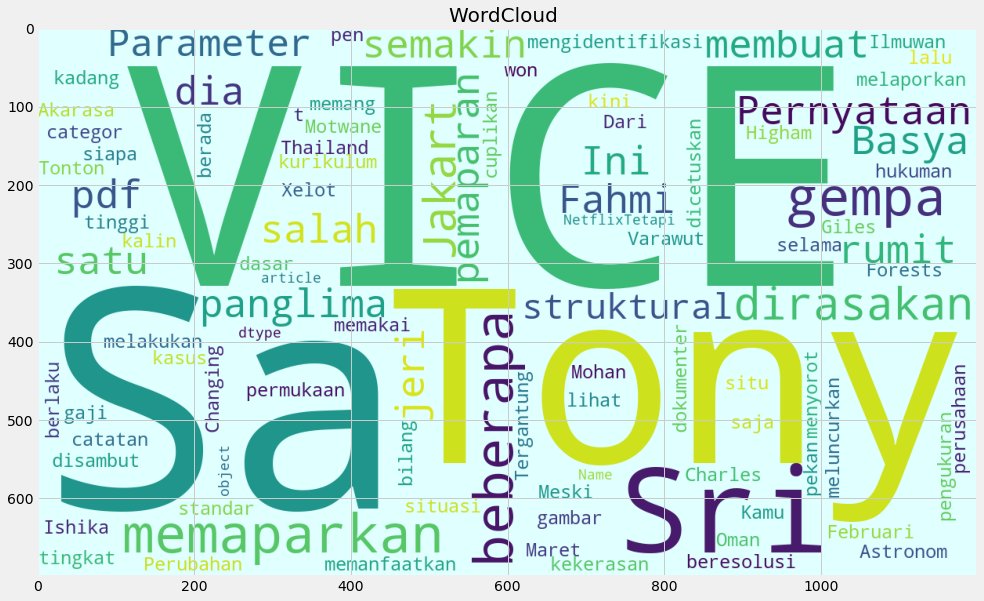

In [4]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(datapd['article']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

# Kata-Kata Yang Paling Sering Terjadi

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

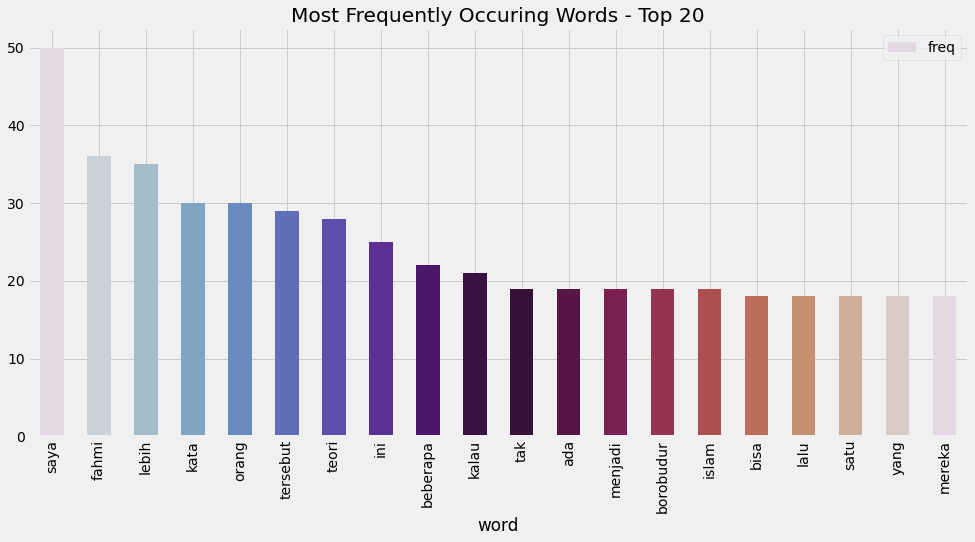

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
words = cv.fit_transform(datapd['article'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [6]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
model.fit(words)

KMeans(max_iter=200, n_clusters=2, n_init=1)

In [14]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")
Y = cv.transform(["Jawa Tengah"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["bencana alam"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Top terms per cluster:
Cluster 0:
 saya
 fahmi
 lebih
 tersebut
 teori
 beberapa
 orang
 ini
 kalau
 islam
Cluster 1:
 gunung
 agung
 kata
 pesan
 pcc
 orang
 ada
 senjata
 segera
 pernyataan


Prediction
Cluster number : [0]
Cluster number : [0]
